In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

sys.path.append(os.path.expandvars('$SCRATCH/code/plots'))
from plots import galcencyl_to_lbdxy, plot_vRvT, plot_RvT, plot_vlvb, plot_Rvl, plot_los, plot_los_cones

# Initial Conditions
Number of samples: 100,000,000

Sampling range: 3 kpc to 13 kpc

Distribution function setup:

    from galpy.df import quasiisothermaldf
    from galpy.potential import MWPotential2014
    from galpy.actionAngle import actionAngleStaeckel
    
    aA = actionAngleStaeckel(pot=MWPotential2014, c=True, delta=0.45)
    qdf = quasiisothermaldf(1./3., 0.15, 0.075, 1., 1., pot=MWPotential2014, aA=aA, cutcounter=True)

In [3]:
data = Table.read('/geir_data/scr/mwbub/data/qdf_samples/100000000_samples.fits', format='fits')
R, vR, vT, z, vz, phi = data['R', 'vR', 'vT', 'z', 'vz', 'phi'].as_array().view((np.float64, 6)).T
phi[phi > np.pi] -= 2*np.pi
del data

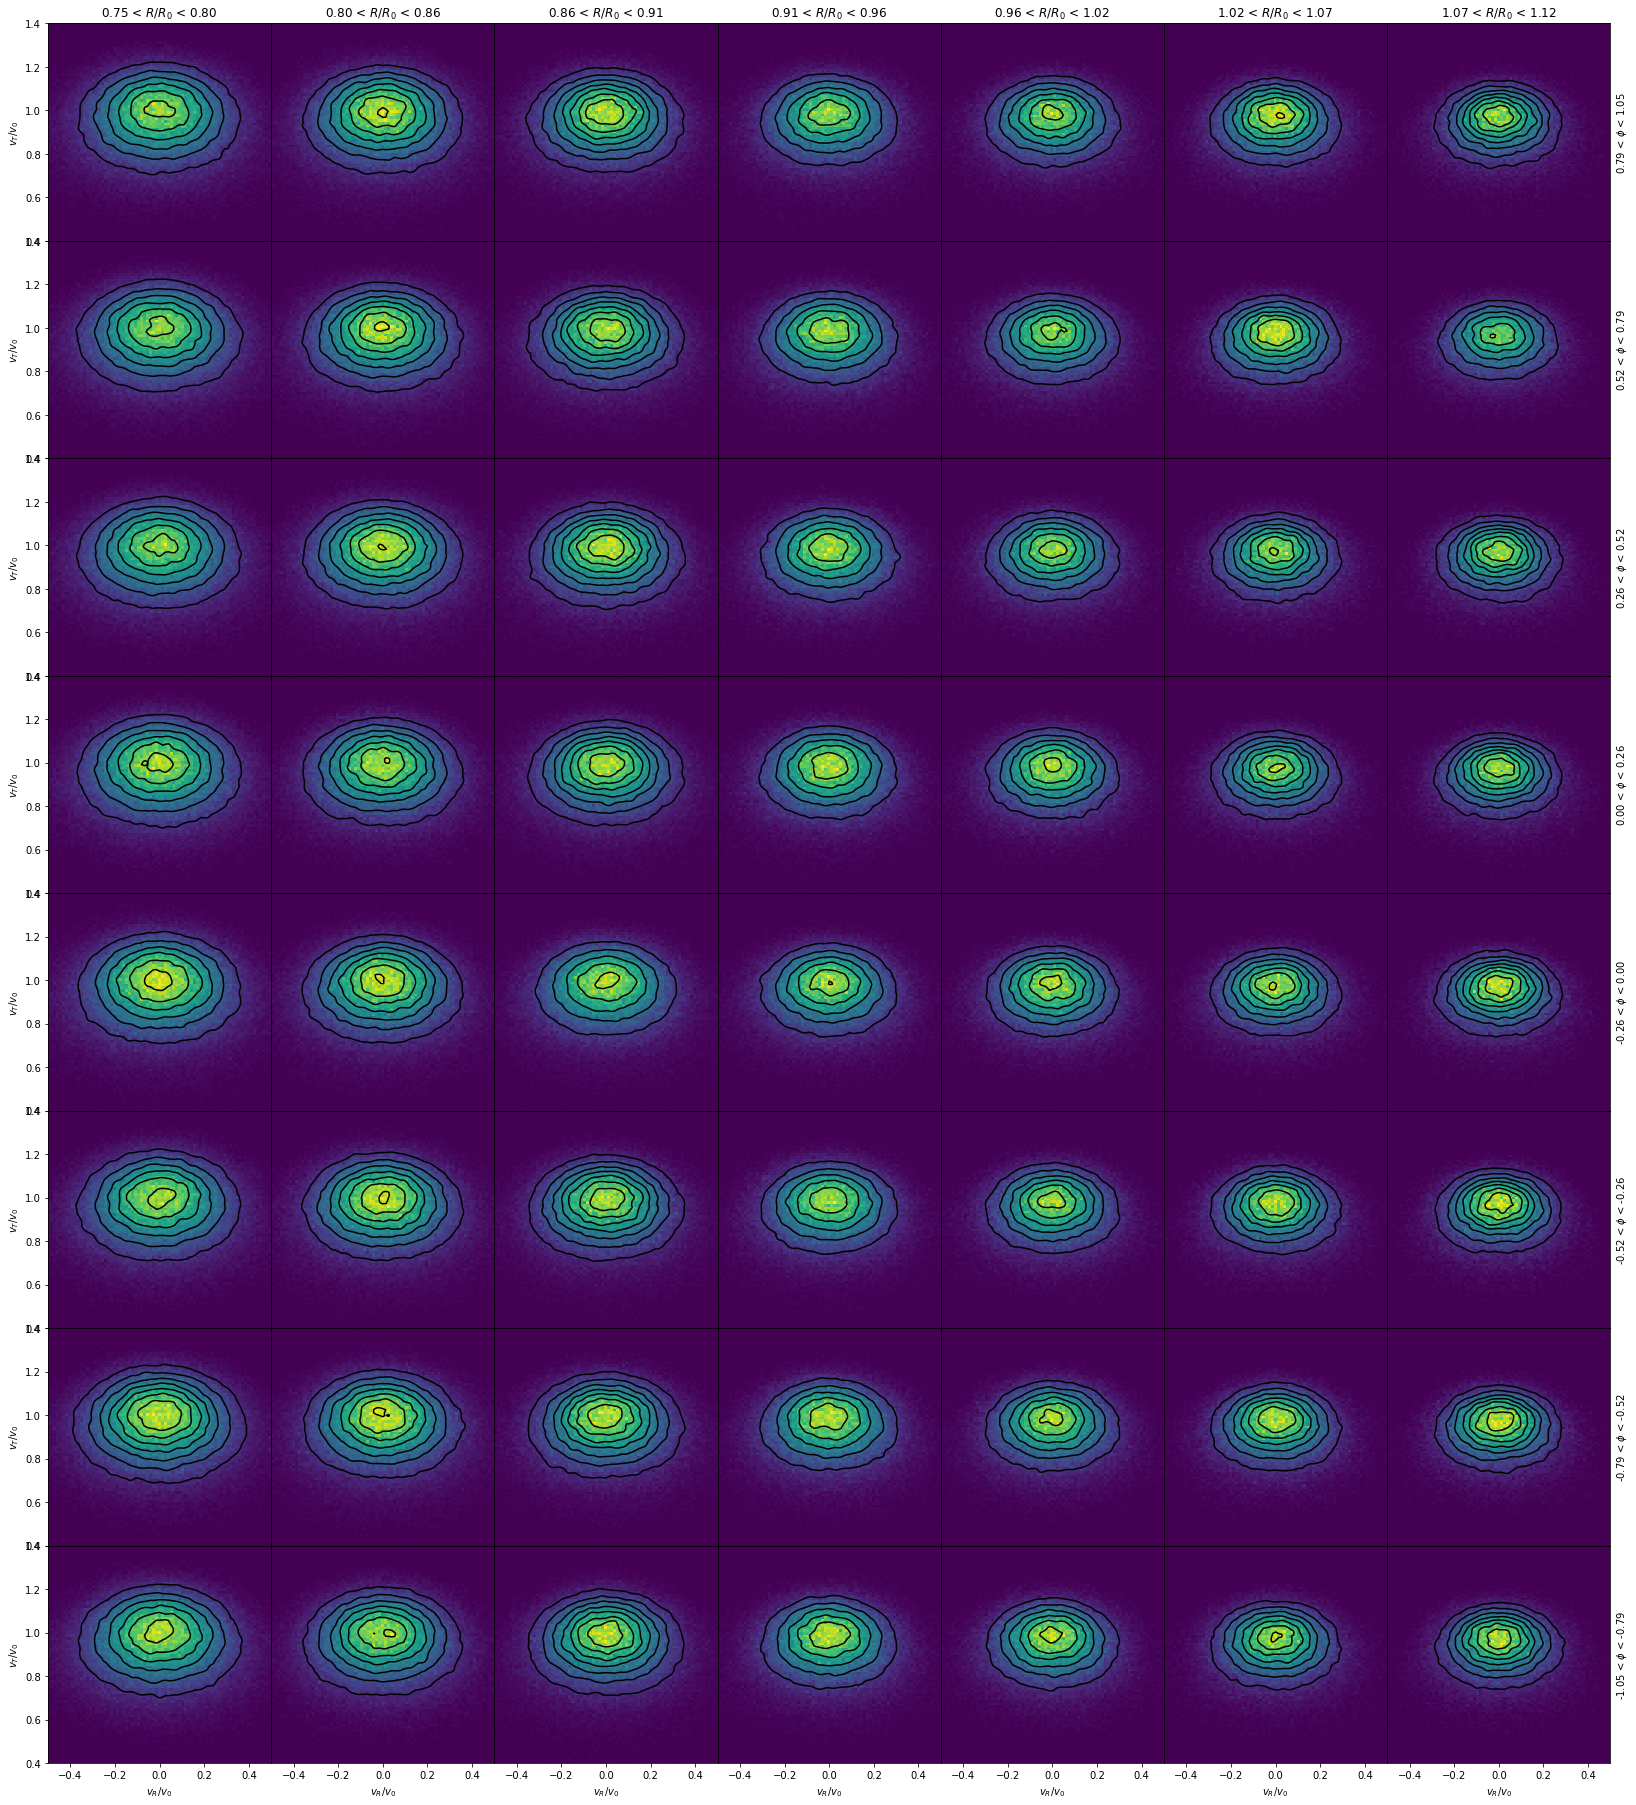

In [9]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vRvT(rows, cols, minR, maxR, minphi, maxphi, R, phi, vR, vT)

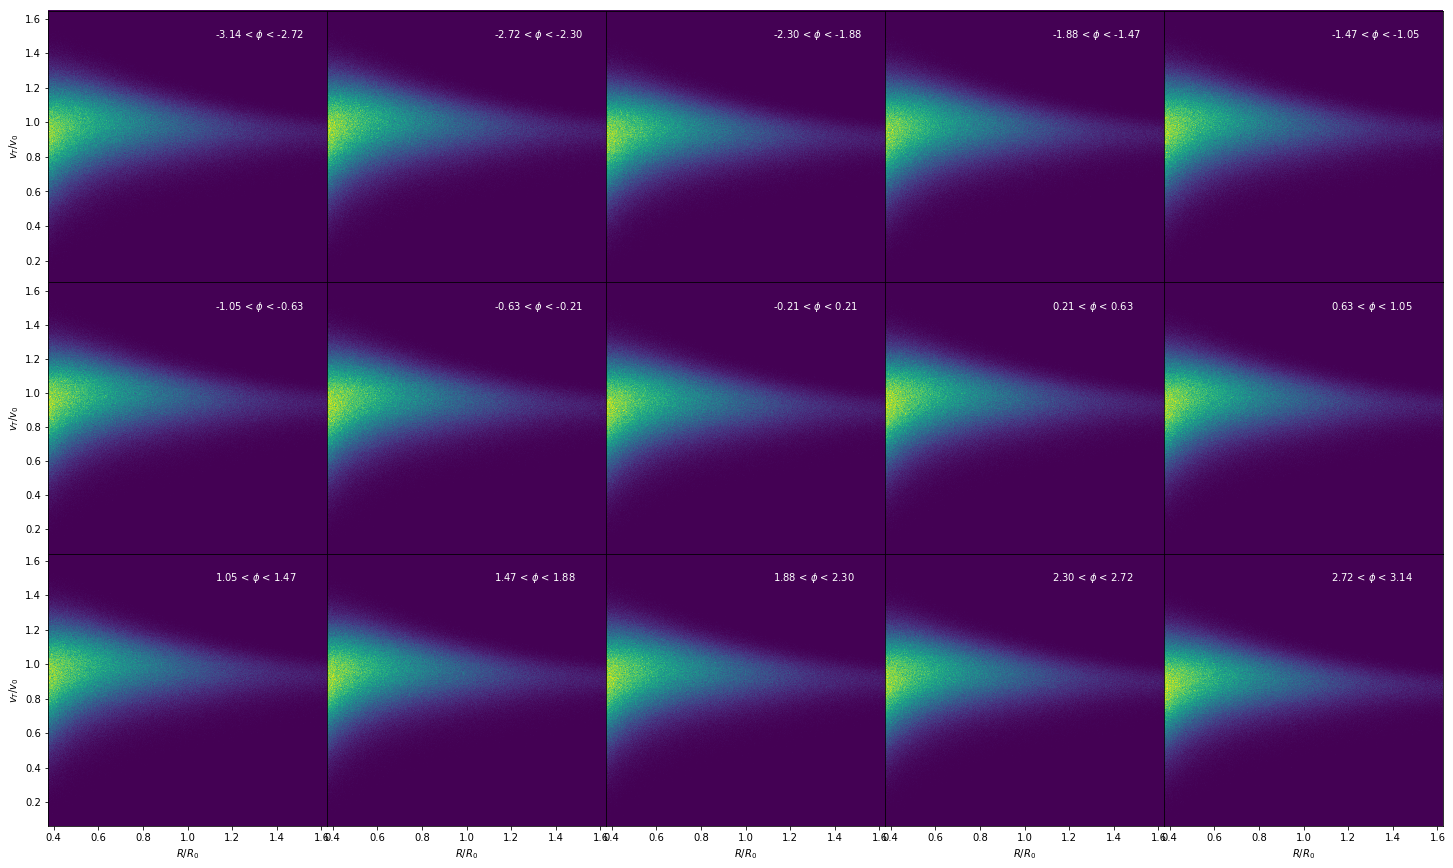

In [10]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_RvT(rows, cols, minphi, maxphi, R, phi, vT)

In [4]:
l, b, d, vr, pmll, pmbb, X, Y = galcencyl_to_lbdxy(R, phi, z, vR, vT, vz)
vl = pmll * d
vb = pmbb * d

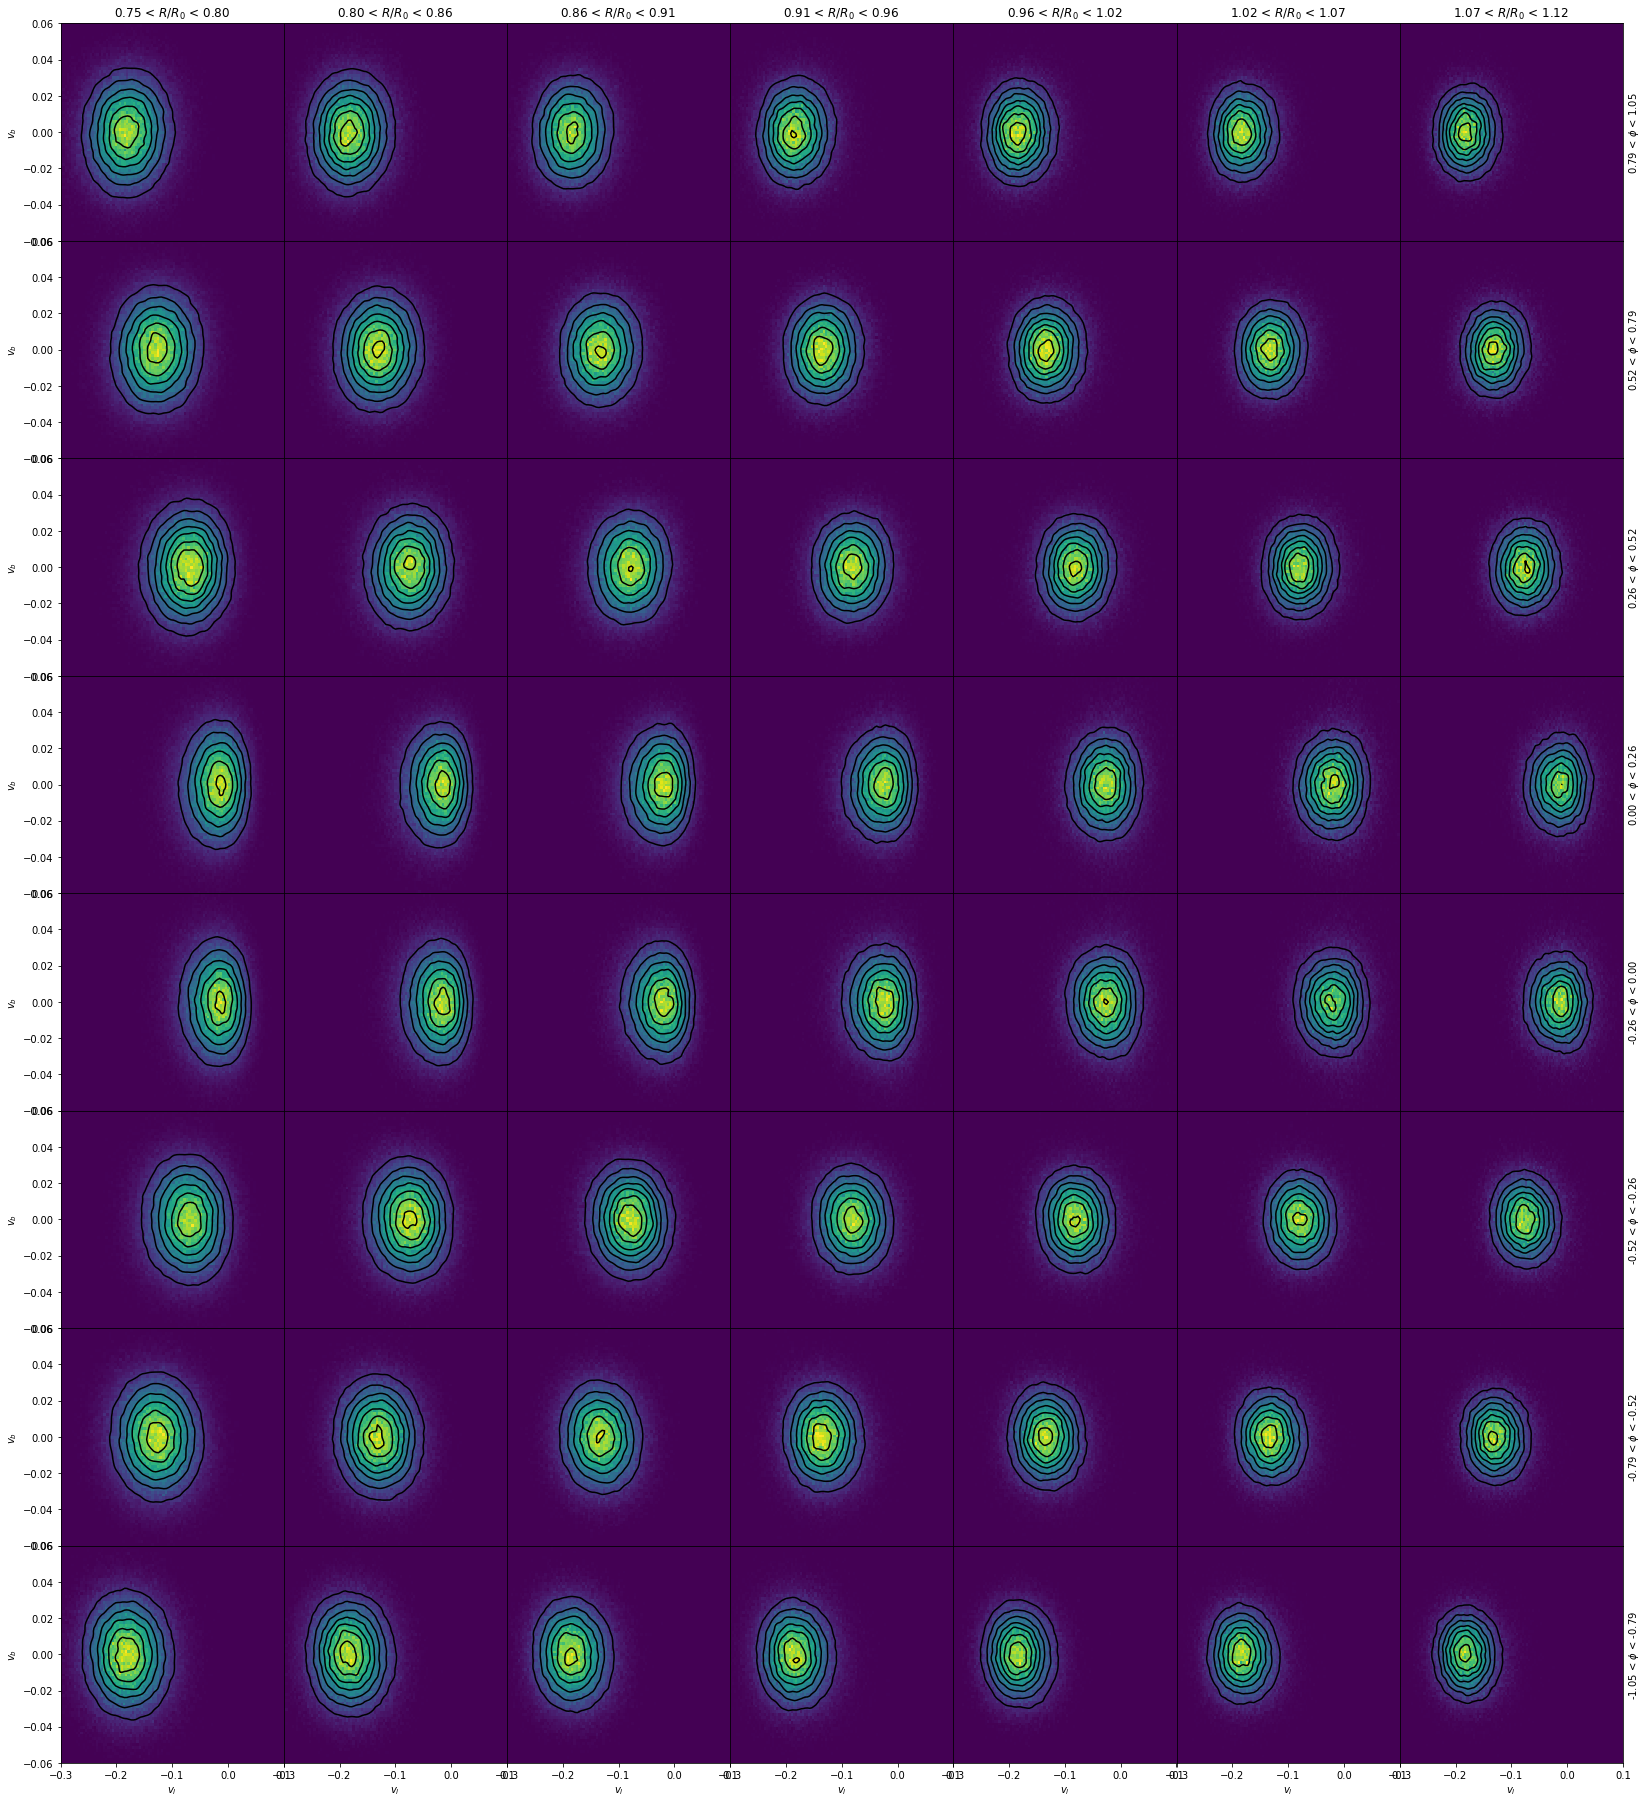

In [12]:
rows = 8
cols = 7
minR = 6
maxR = 9
minphi = -np.pi/3
maxphi = np.pi/3
plot_vlvb(rows, cols, minR, maxR, minphi, maxphi, R, phi, vl, vb)

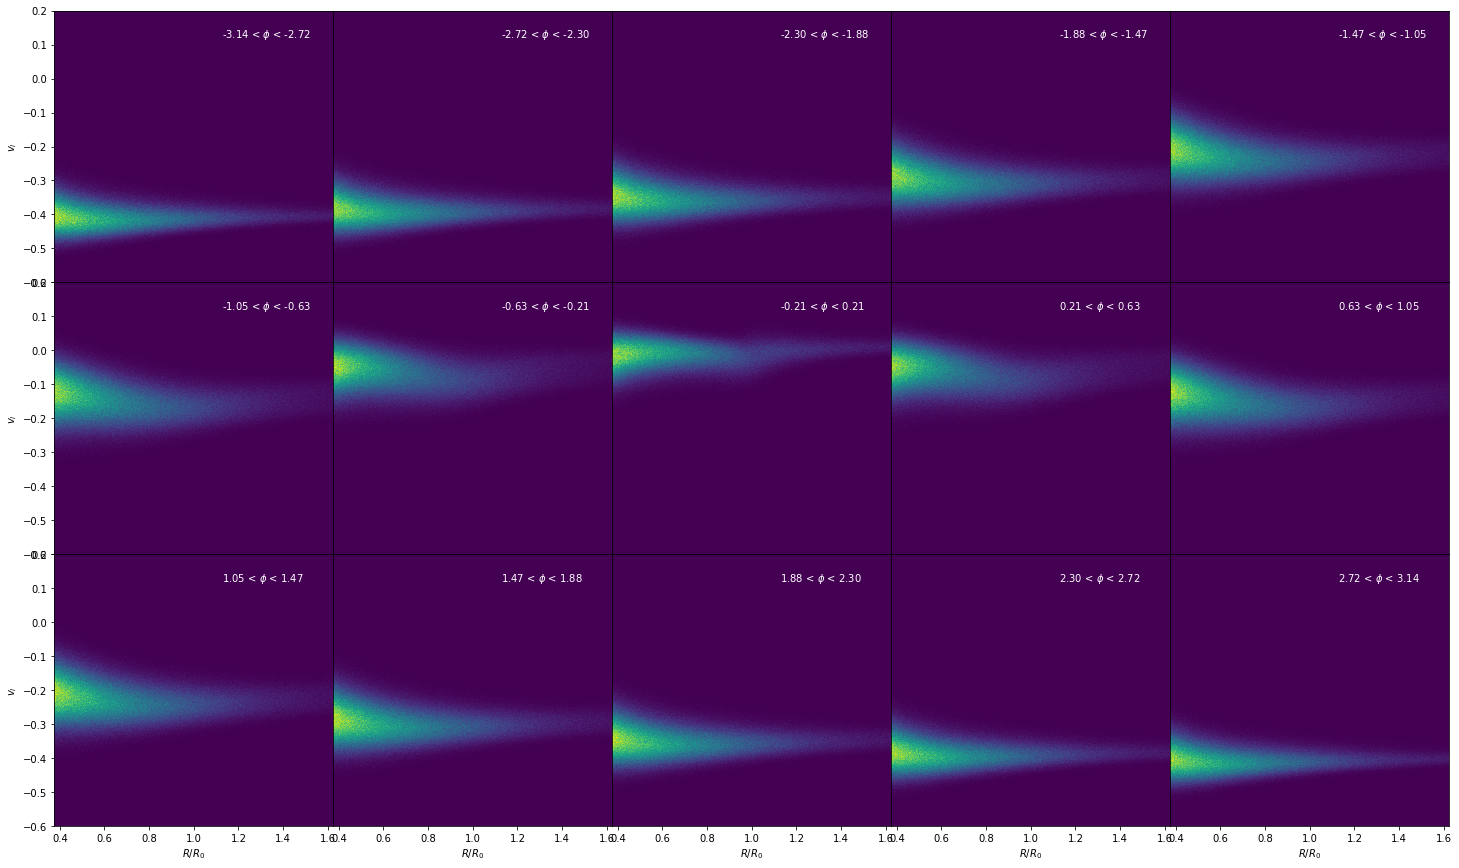

In [13]:
rows = 3
cols = 5
minphi = -np.pi
maxphi = np.pi
plot_Rvl(rows, cols, minphi, maxphi, R, phi, vl)

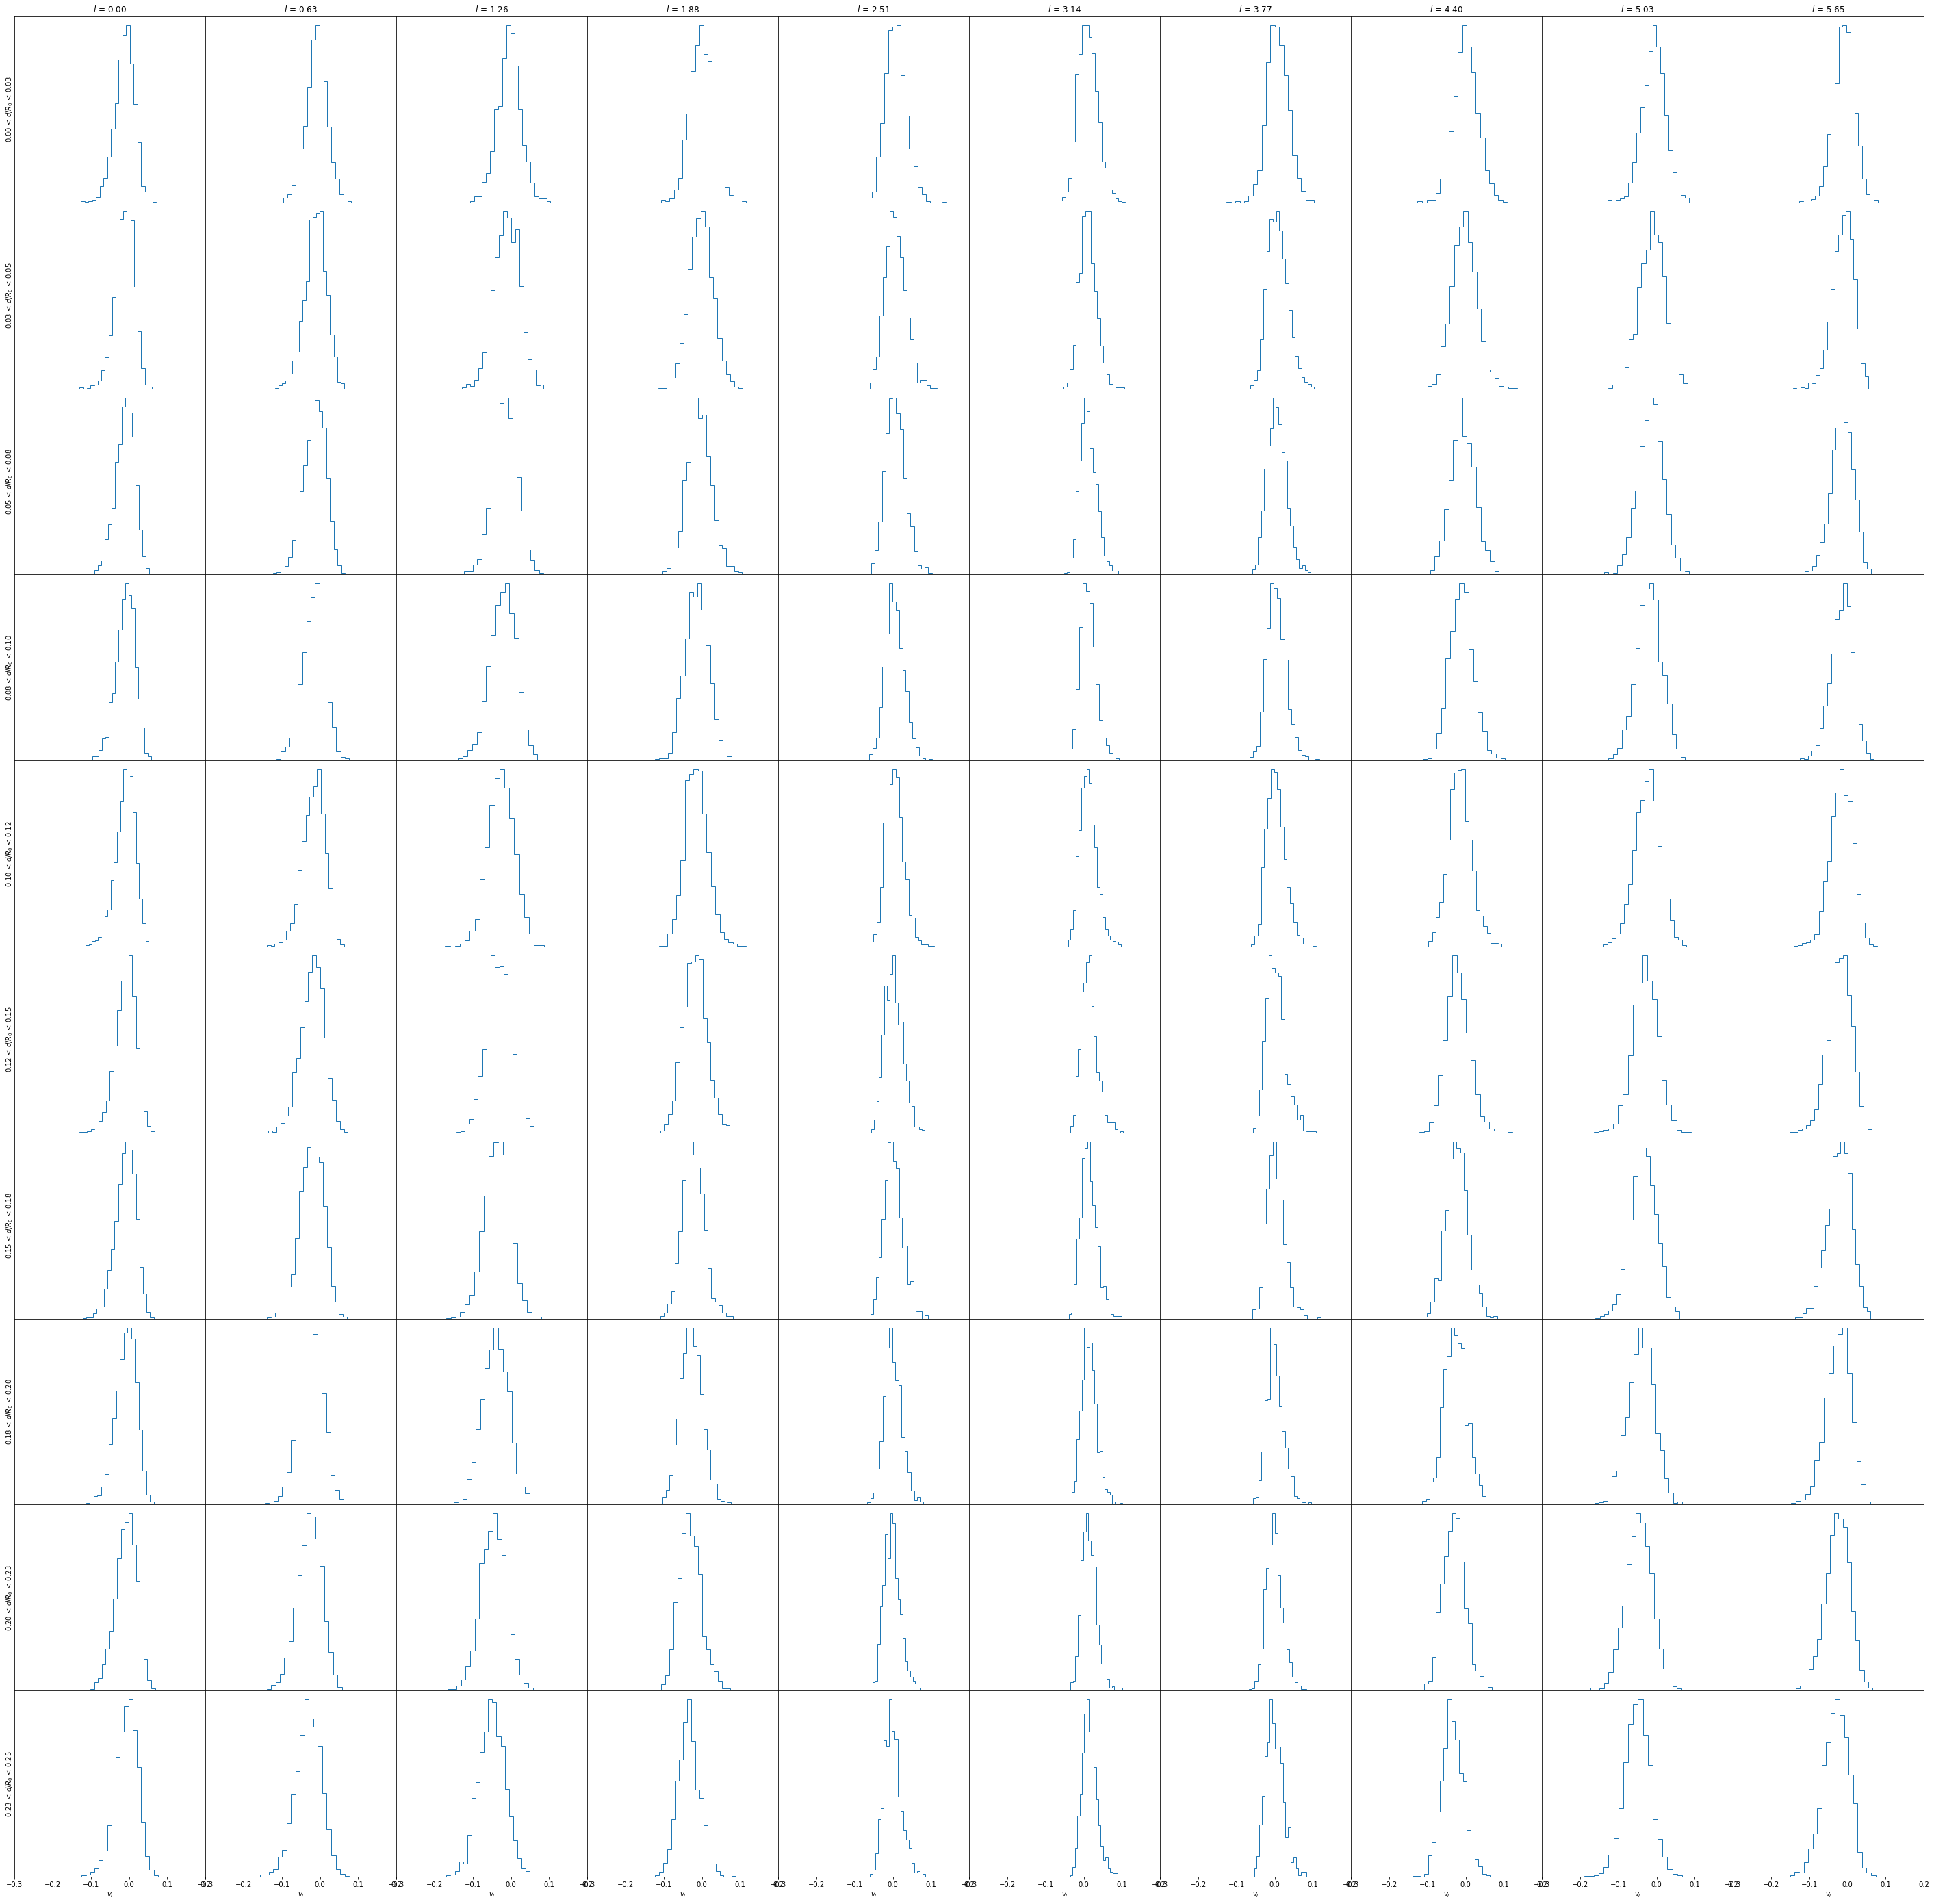

In [14]:
rows = 10
cols = 10
minl = 0
maxl = 2*np.pi
xlength = 0.25
ywidth = 0.01
plot_los(rows, cols, minl, maxl, xlength, ywidth, X, Y, vl)

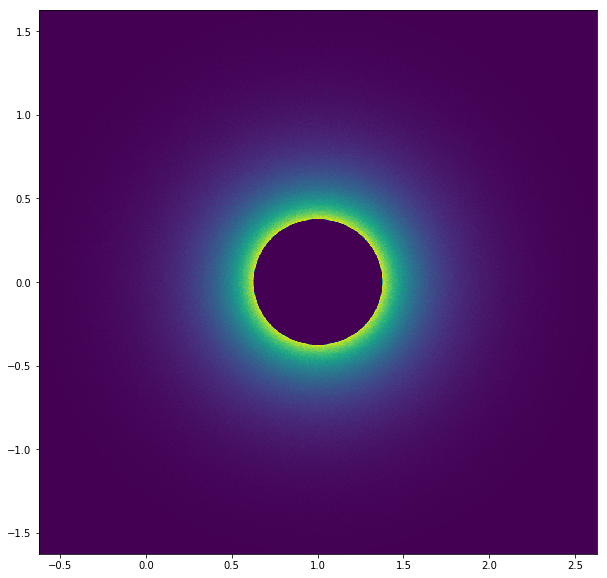

In [5]:
plt.figure(figsize=(10,10))
mask = [R < 13/8.]
plt.hist2d(X[mask], Y[mask], bins=1000)
plt.show()